In [35]:
import numpy as np
import pandas as pd
import exomerge
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import scipy.stats as st
import seaborn as sns
import scipy.interpolate

%matplotlib inline

In [3]:
model = exomerge.import_model('./data for figs/2019.06.12_PTM2_out_exomerge.e', timesteps='last', node_field_names='all')



You are using Exomerge v8.5 -- A lightweight Python interface for manipulating
ExodusII files.

You are using exodus.py v 1.08 (beta-cmake), a python wrapper of some of the
exodus library.  Copyright (c) 2013, 2014, 2015, 2016, 2017, 2018 National
Technology & Engineering Solutions of Sandia, LLC (NTESS).  Under the terms of
Contract DE-NA0003525 with NTESS, the U.S.  Government retains certain rights
in this software.



In [4]:
print model.summarize()

The model contains the following:
  137500 elements
  1 timesteps
  0 global variables
  145656 nodes
  16 node fields
  2 element blocks
  6 element fields
  6 node sets
  0 node set fields
  6 side sets
  0 side set fields
None


In [5]:
 print model.get_node_field_names()

['depth', 'disp_i', 'disp_j', 'disp_k', 'pressure', 'stress_ii', 'stress_jj', 'stress_kk', 'temp_C', 'temperature', 'total_stress_ii', 'total_stress_jj', 'total_stress_kk', 'x_i', 'y_i', 'z_i']


In [6]:
print model.get_element_field_names()

['stress_ii', 'stress_ij', 'stress_ik', 'stress_jj', 'stress_jk', 'stress_kk']


In [7]:
x = model.get_node_field_values('x_i')

In [8]:
y = model.get_node_field_values('y_i')

In [9]:
z = model.get_node_field_values('z_i')

In [14]:
temperature_C = model.get_node_field_values('temp_C')

In [15]:
pressure = model.get_node_field_values('pressure')

In [16]:
sigma_V = model.get_node_field_values('total_stress_kk')

In [17]:
h_max = model.get_node_field_values('total_stress_jj')

In [18]:
h_min = model.get_node_field_values('total_stress_ii')

In [20]:
data = np.column_stack([x, y, z, temperature_C, pressure, sigma_V, h_max, h_min])

In [21]:
print data.shape

(145656, 8)





get values for layer elevations

In [92]:
np.unique(data[:,1])

array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,  400.,
        450.,  500.,  550.,  600.,  650.,  700.,  750.,  800.,  850.,
        900.,  950., 1000., 1050., 1100., 1150., 1200., 1250., 1300.,
       1350., 1400., 1450., 1500., 1550., 1600., 1650., 1700., 1750.,
       1800., 1850., 1900., 1950., 2000., 2050., 2100., 2150., 2200.,
       2250., 2300., 2350., 2400., 2450., 2500.])

In [26]:
data_top = data[data[:,2] == 1250] # select rows where first column is greater than 3

In [29]:
x = data_top[:,0]

In [30]:
y = data_top[:,1]

In [31]:
X, Y = np.meshgrid(x, y)

first do the top

In [63]:
Z = data_top[:,5]/1e6  #3 = temperature, 4 = press, 5 = S_V

In [64]:
xi, yi = np.linspace(x.min(), x.max(), 50), np.linspace(y.min(), y.max(), 50)
xi, yi = np.meshgrid(xi, yi)

In [65]:
zi = scipy.interpolate.griddata((x, y), Z, (xi, yi), method='linear')

In [38]:
plt.style.use('classic')

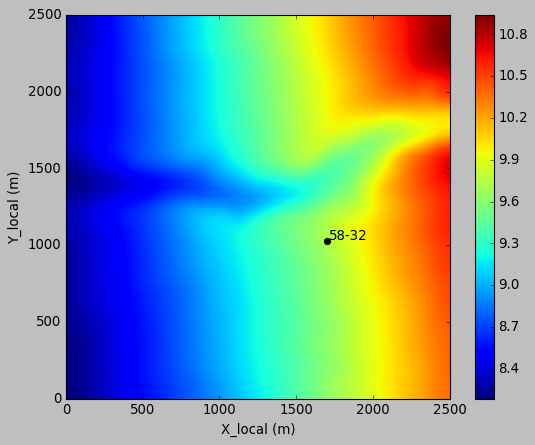

In [66]:

#this gives filled contours
plt.imshow(zi, vmin=Z.min(), vmax=Z.max(), origin='lower', 
           extent=[x.min(), x.max(), y.min(), y.max()])  

#this gives contour lines
#plt.contour(zi, vmin=Z.min(), vmax=Z.max(), origin='lower',
 #          extent=[x.min(), x.max(), y.min(), y.max()])
plt.colorbar()
plt.xlabel('X_local (m)')
plt.ylabel('Y_local (m)')
plt.plot(1700, 1029, 'ko') #this is 58-32
plt.text(1715, 1035, "58-32", fontsize=12)
plt.savefig('top_S_v.png', bbox_inches='tight', dpi = 300)
plt.show()


now the bot temperature

In [67]:
data_bot = data[data[:,2] == -1500] # select rows where first column is greater than 3

In [69]:
x = data_top[:,0]
y = data_top[:,1]
X, Y = np.meshgrid(x, y)

In [74]:
Z = data_bot[:,3]  #3 = temperature, 4 = press, 5 = S_V

In [75]:
xi, yi = np.linspace(x.min(), x.max(), 50), np.linspace(y.min(), y.max(), 50)
xi, yi = np.meshgrid(xi, yi)

In [76]:
zi = scipy.interpolate.griddata((x, y), Z, (xi, yi), method='linear')

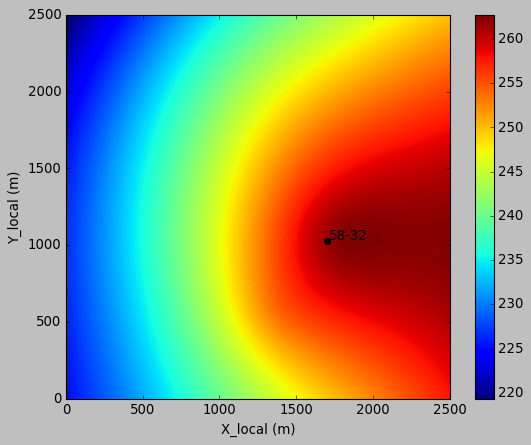

In [77]:

#this gives filled contours
plt.imshow(zi, vmin=Z.min(), vmax=Z.max(), origin='lower', 
           extent=[x.min(), x.max(), y.min(), y.max()])  

#this gives contour lines
#plt.contour(zi, vmin=Z.min(), vmax=Z.max(), origin='lower',
 #          extent=[x.min(), x.max(), y.min(), y.max()])
plt.colorbar()
plt.xlabel('X_local (m)')
plt.ylabel('Y_local (m)')
plt.plot(1700, 1029, 'ko') #this is 58-32
plt.text(1715, 1035, "58-32", fontsize=12)
plt.savefig('bot_temp.png', bbox_inches='tight', dpi = 300)
plt.show()

now can do Sh_min

In [79]:
data_right = data[data[:,0] == 2500] # select rows where first column is greater than 3

In [81]:
x = data_right[:,1]
y = data_right[:,2]
X, Y = np.meshgrid(x, y)

In [86]:
Z = data_right[:,7] /1e6 #this is sh min

In [87]:
xi, yi = np.linspace(x.min(), x.max(), 50), np.linspace(y.min(), y.max(), 50)
xi, yi = np.meshgrid(xi, yi)

In [88]:
zi = scipy.interpolate.griddata((x, y), Z, (xi, yi), method='linear')

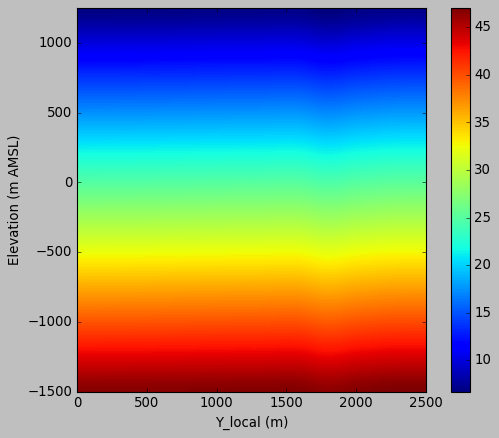

In [91]:

#this gives filled contours
plt.imshow(zi, vmin=Z.min(), vmax=Z.max(), origin='lower', 
           extent=[x.min(), x.max(), y.min(), y.max()])  

#this gives contour lines
#plt.contour(zi, vmin=Z.min(), vmax=Z.max(), origin='lower',
 #          extent=[x.min(), x.max(), y.min(), y.max()])
plt.colorbar()
plt.xlabel('Y_local (m)')
plt.ylabel('Elevation (m AMSL)')

plt.savefig('right_sh_min.png', bbox_inches='tight', dpi = 300)
plt.show()

and now SH_max

In [93]:
data_y_top = data[data[:,1] == 2500] # select rows where first column is greater than 3

In [94]:
x = data_y_top[:,0]
y = data_y_top[:,2]
X, Y = np.meshgrid(x, y)

In [95]:
Z = data_right[:,6] /1e6 #this is sh max

In [96]:
xi, yi = np.linspace(x.min(), x.max(), 50), np.linspace(y.min(), y.max(), 50)
xi, yi = np.meshgrid(xi, yi)

In [97]:
zi = scipy.interpolate.griddata((x, y), Z, (xi, yi), method='linear')

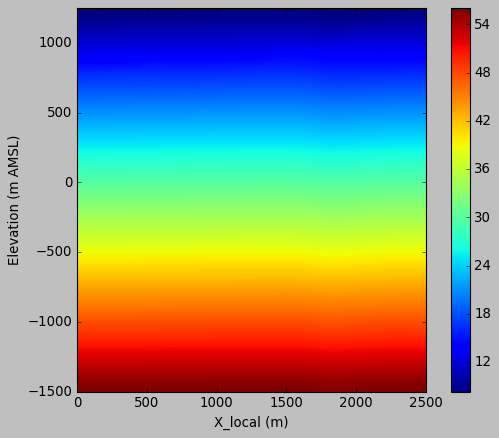

In [99]:

#this gives filled contours
plt.imshow(zi, vmin=Z.min(), vmax=Z.max(), origin='lower', 
           extent=[x.min(), x.max(), y.min(), y.max()])  

#this gives contour lines
#plt.contour(zi, vmin=Z.min(), vmax=Z.max(), origin='lower',
 #          extent=[x.min(), x.max(), y.min(), y.max()])
plt.colorbar()
plt.xlabel('X_local (m)')
plt.ylabel('Elevation (m AMSL)')

plt.savefig('y_top_sh_max.png', bbox_inches='tight', dpi = 300)
plt.show()